In [56]:
import webrtcvad
import os
import sys
import sox
import shutil
from operator import itemgetter
from itertools import groupby
import numpy as np
import shutil 
import pandas as pd
from scipy import stats
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ranksums
import pandas as pd
import numpy as np
from scipy import stats
import glob
import matplotlib.pyplot as plt
from scipy.stats import ranksums
import seaborn as sns
import numpy as np
from sklearn import metrics
from numpy.random import randn
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt
import numpy as np
import os
#!pip install scikit-posthocs
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [57]:
from numpy.random import randn
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt
import numpy as np
import scipy.stats as st



def compute_auc(array_1, array_2):
    xs = np.concatenate([array_1, array_2],axis=1)
    y = np.concatenate([array_1.shape[1]*[2], array_2.shape[1]*[1]])
    
    for i, x in enumerate(xs):
        fpr, tpr, thresholds = metrics.roc_curve(y, x, pos_label=2)
        #print(i, metrics.auc(fpr, tpr))
        m = metrics.roc_auc_score(y, x)
        print(round(max(m, 1-m), 2))

        
def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
         


In [58]:
def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)
            
    return list_object

def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
         

def compute_eta_squared(H, n_of_grp,n_of_observ):
    return (H - n_of_grp + 1)/(n_of_observ - n_of_grp)

In [59]:
def read_stats_test(file):
    
    with open(file, 'r') as f:
        lista = []
        testo = f.readlines()
        testo = [line.strip("\n") for line in testo]

        for line in testo:
            if line=="":
                pass
            else:
                lista.append(line)
                
    return lista

In [60]:
def holm_correction(kruskal):
    line_to_remove=[]
    values=[]
    corrected =[]
    final = []
    for l in kruskal:
        if "nan" in l:
            line_to_remove.append(kruskal.index(l))
    
    new_krusk = delete_multiple_element(kruskal, line_to_remove)
            
    for line in new_krusk:
        ok = line.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(float(num))
   # values = [x for x in values if isnan(x) == False]
    result = statsmodels.stats.multitest.fdrcorrection(values, alpha=0.05, method='indep', is_sorted=False)
    num = np.where(result[0] == True)
    list_index = ((num)[0]).tolist()

    for i in list_index:
        corrected.append(result[1][i])
    for i in list_index:
        final.append(kruskal[i])
    
    return final, corrected
    
    
    #return values
#val = np.array(values)
    #return statsmodels.stats.multitest.fdrcorrection(values, alpha=0.05, method='indep', is_sorted=False)

In [61]:
df_30msec = pd.read_csv("/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/NEUROVOZ/Acoustic/Pauses/prosody_features_2022-10-18-07-46-16.csv")
df_30msec = df_30msec.drop(columns=['Unnamed: 0'])
df_30msec['labels']=df_30msec['AudioFile'].str.split('_').str[0]
tasks=[]
for every in df_30msec['AudioFile']:
    #tasks.append(every.split("_")[1])#.split("_")
    tasks.append(every.split("_")[1])
   
df_30msec['task'] = tasks
task_grouped_ = df_30msec.groupby("task")
concatenateread = task_grouped_.get_group("concatenateread")
ESPONTANEA = task_grouped_.get_group("ESPONTANEA")


In [37]:
#full = pd.concat([concatenateread, ESPONTANEA])

In [38]:
#full.to_csv("/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/NEUROVOZ/Acoustic/Pauses/Pause_only_conct.csv")

## Text Dependent Utterances (TDUs)

In [62]:
grouped = concatenateread.groupby("labels") #here we extract the values by category

control = grouped.get_group("HC") 
parkinson_ = grouped.get_group("PD")
task = concatenateread.columns[:-4].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(concatenateread.columns[:-4])])
control_all_feat = np.array([control[feat] for feat in np.array(concatenateread.columns[:-4])])

with open('/export/b15/afavaro/Frontiers/submission/SPANISH/ACOUSTIC/VAD/Results/concat_read.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/SPANISH/ACOUSTIC/VAD/Results/concat_read.txt')
holm_correction(kruskal_1)


(['kruskal results for Speech_Time_VADInt_1 controls vs. parkinson 9.787699657955103e-05 ',
  'kruskal results for Total_Time_VADInt_1 controls vs. parkinson 0.00011014823085769867 ',
  'kruskal results for Pause_Percentage_VADInt_1 controls vs. parkinson 0.0006562038631925264 ',
  'kruskal results for Pause_Speech_Ratio_VADInt_1 controls vs. parkinson 0.0006562038631925264 ',
  'kruskal results for Pause_Variability_VADInt_1 controls vs. parkinson 0.008003792227662372 ',
  'kruskal results for Speech_Time_VADInt_2 controls vs. parkinson 3.1450432687298526e-05 ',
  'kruskal results for Total_Time_VADInt_2 controls vs. parkinson 9.623221288912363e-05 ',
  'kruskal results for Pause_Percentage_VADInt_2 controls vs. parkinson 0.00010298605274272751 ',
  'kruskal results for Pause_Speech_Ratio_VADInt_2 controls vs. parkinson 0.00010298605274272751 ',
  'kruskal results for Speech_Time_VADInt_3 controls vs. parkinson 0.02896429183937836 ',
  'kruskal results for Total_Time_VADInt_3 controls

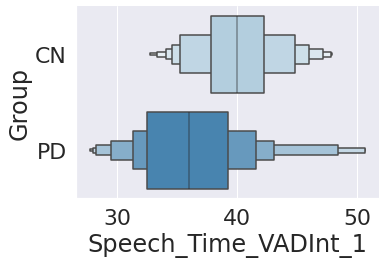

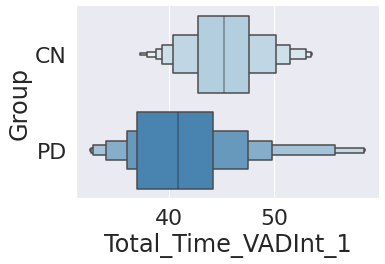

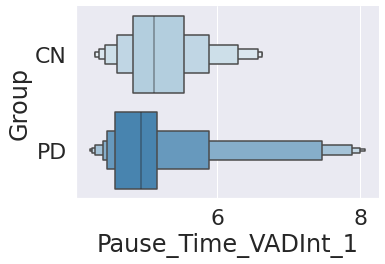

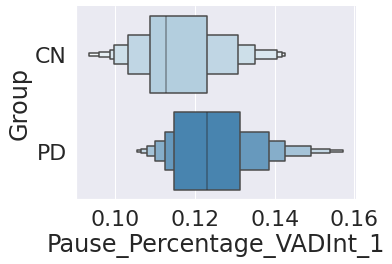

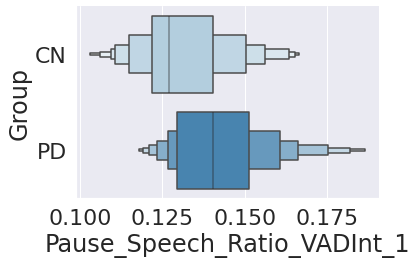

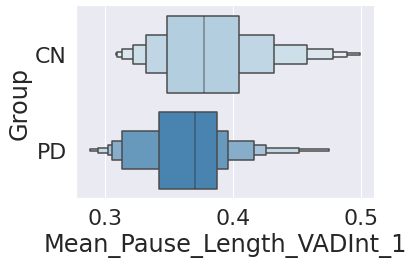

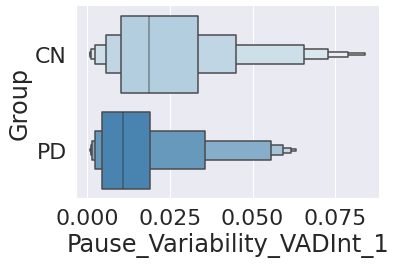

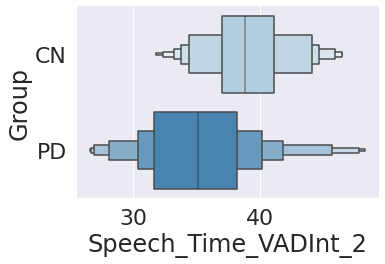

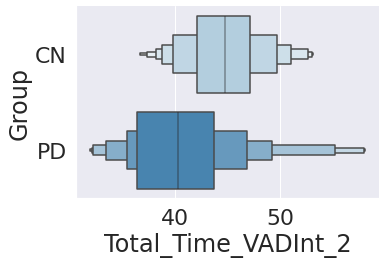

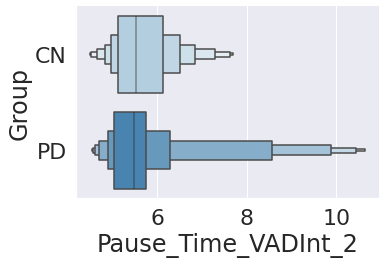

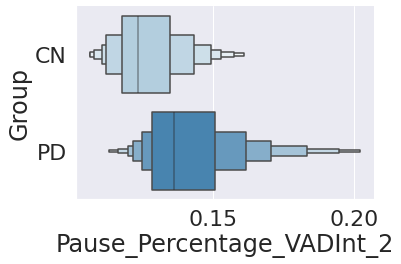

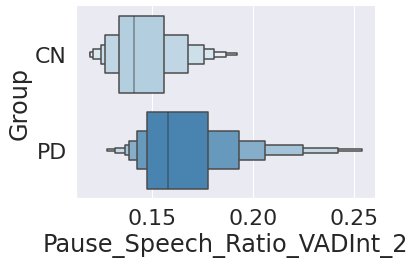

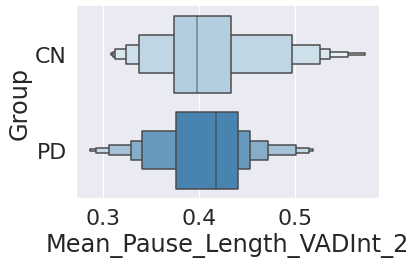

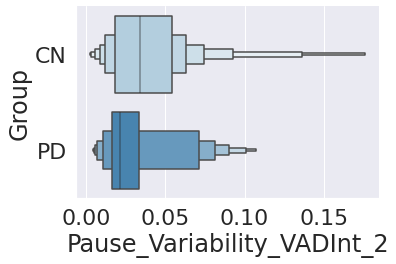

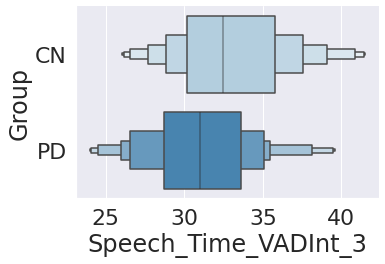

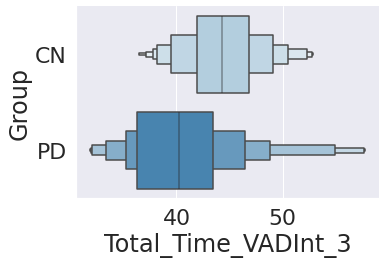

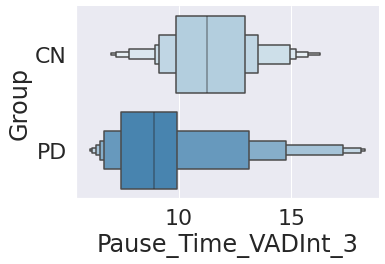

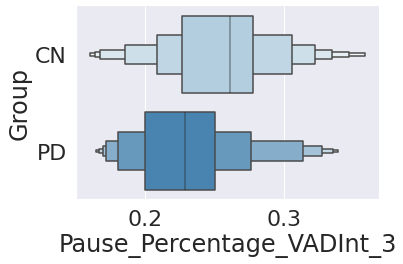

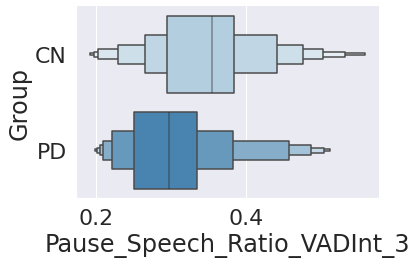

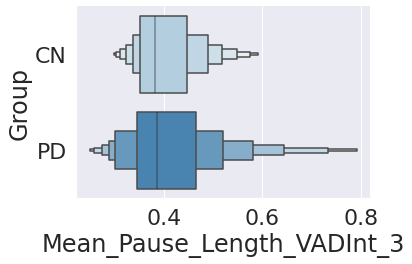

In [63]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
   
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
   
    lista = controls+parkinson
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
    #plt.savefig(f'/export/b15/afavaro/Frontiers/submission/SPANISH/Plots/{nome}.png', facecolor='white', dpi=600)

## Monologue

In [64]:
grouped = ESPONTANEA.groupby("labels") #here we extract the values by category
control = grouped.get_group("HC") 
parkinson_ = grouped.get_group("PD")
task = ESPONTANEA.columns[1:-4].values.tolist()

parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(ESPONTANEA.columns[1:-4])])
control_all_feat = np.array([control[feat] for feat in np.array(ESPONTANEA.columns[1:-4])])

with open('/export/b15/afavaro/Frontiers/submission/SPANISH/ACOUSTIC/VAD/Results/spont.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/SPANISH/ACOUSTIC/VAD/Results/spont.txt')
holm_correction(kruskal_1)

([], [])

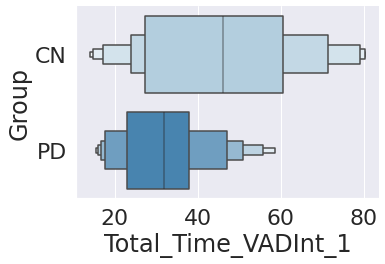

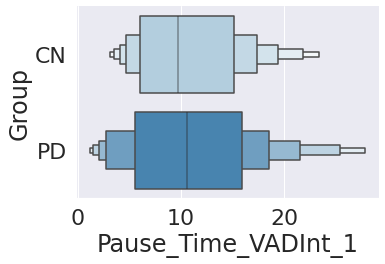

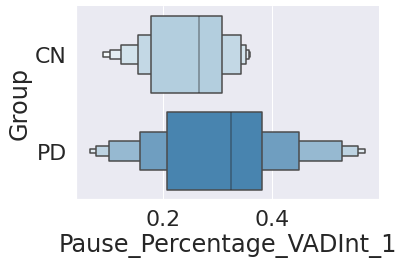

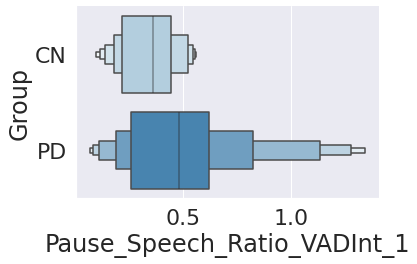

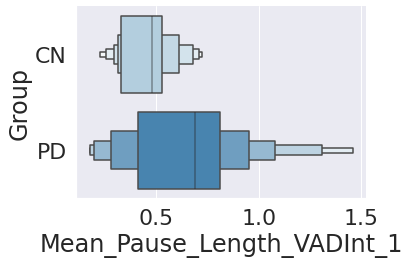

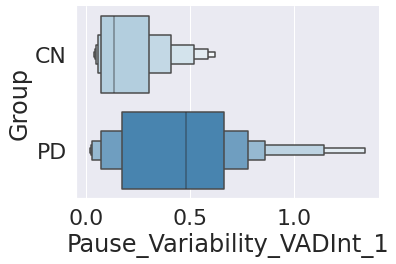

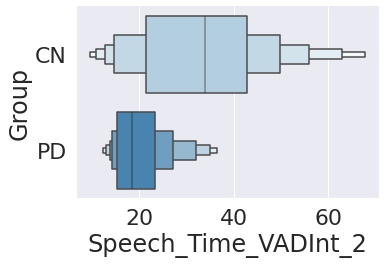

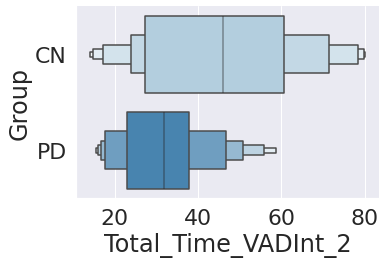

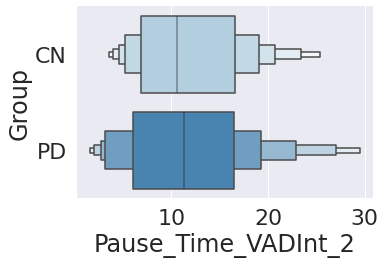

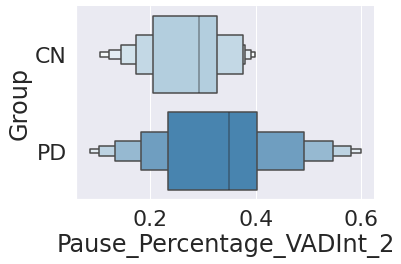

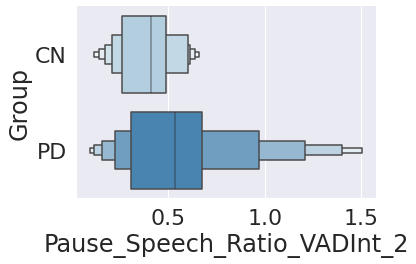

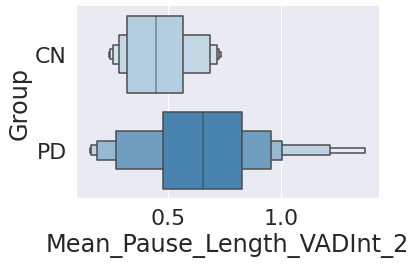

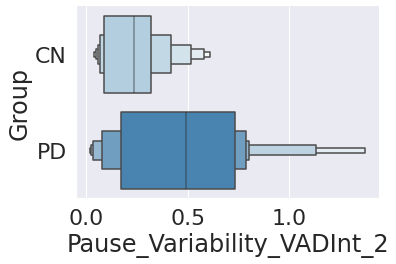

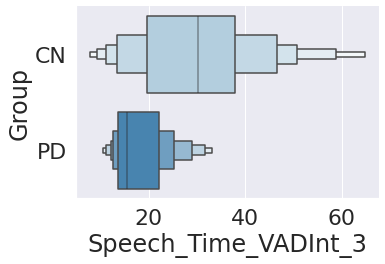

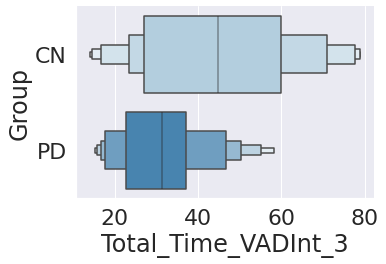

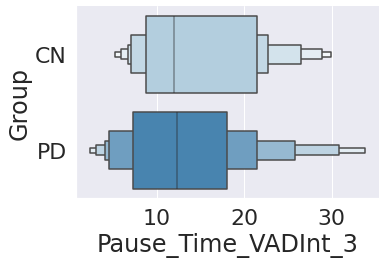

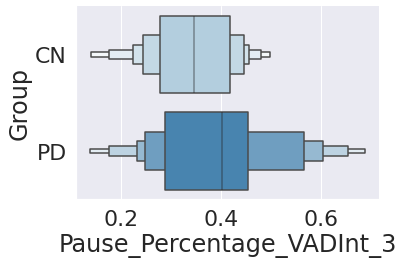

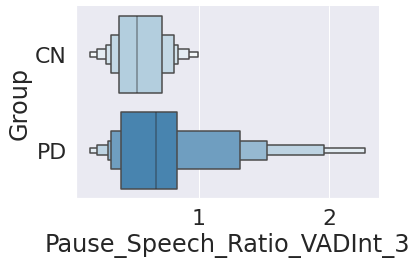

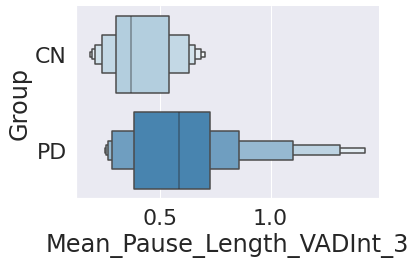

In [65]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
   
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
   
    lista = controls+parkinson
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
    #plt.savefig(f'/export/b15/afavaro/Frontiers/submission/SPANISH/Plots/{nome}.png', facecolor='white', dpi=600)